## Prevalence of Obesity in the Adult Population

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [256]:
df = pd.read_csv('/Users/aathik/Documents/Uwin/ADT/Project/Notebooks2/PROJECT-ADT/obesity.csv')

#### Data Preprocessing

In [257]:
df.head()

,Year,Algeria,Brazil,China,Fiji,Guatemala,Venezuela,Mexico,Somalia,Madagascar,...,Solomon Islands,Chile,Uruguay,Argentina,Paraguay,Suriname,Bolivia (Plurinat. State of),Ecuador,Chad,Comoros
0,2000,17.4,14.5,2.3,21.0,12.9,19.4,19.4,4.1,2.3,...,13.5,20.6,20.6,20.7,12.3,18.9,13.2,13.2,2.9,4.1
1,2001,17.9,15.0,2.5,21.5,13.4,19.9,19.9,4.3,2.4,...,14.0,21.0,21.0,21.2,12.8,19.4,13.6,13.6,3.1,4.3
2,2002,18.5,15.5,2.6,22.1,13.9,20.3,20.3,4.5,2.5,...,14.4,21.5,21.4,21.6,13.3,19.8,14.0,14.0,3.2,4.5
3,2003,19.1,15.9,2.8,22.6,14.3,20.6,20.6,4.7,2.7,...,14.9,21.9,21.9,22.1,13.8,20.3,14.4,14.4,3.4,4.7
4,2004,19.6,16.4,3.0,23.2,14.8,21.0,21.0,4.9,2.8,...,15.4,22.4,22.3,22.5,14.2,20.7,14.8,14.8,3.6,4.9


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              17 non-null     int64  
 1   Algeria                           17 non-null     float64
 2   Brazil                            17 non-null     float64
 3   China                             17 non-null     float64
 4   Fiji                              17 non-null     float64
 5   Guatemala                         17 non-null     float64
 6   Venezuela                         17 non-null     float64
 7   Mexico                            17 non-null     float64
 8   Somalia                           17 non-null     float64
 9   Madagascar                        17 non-null     float64
 10  India                             17 non-null     float64
 11  Papua New Guinea                  17 non-null     float64
 12  Romania   

#### Analysis

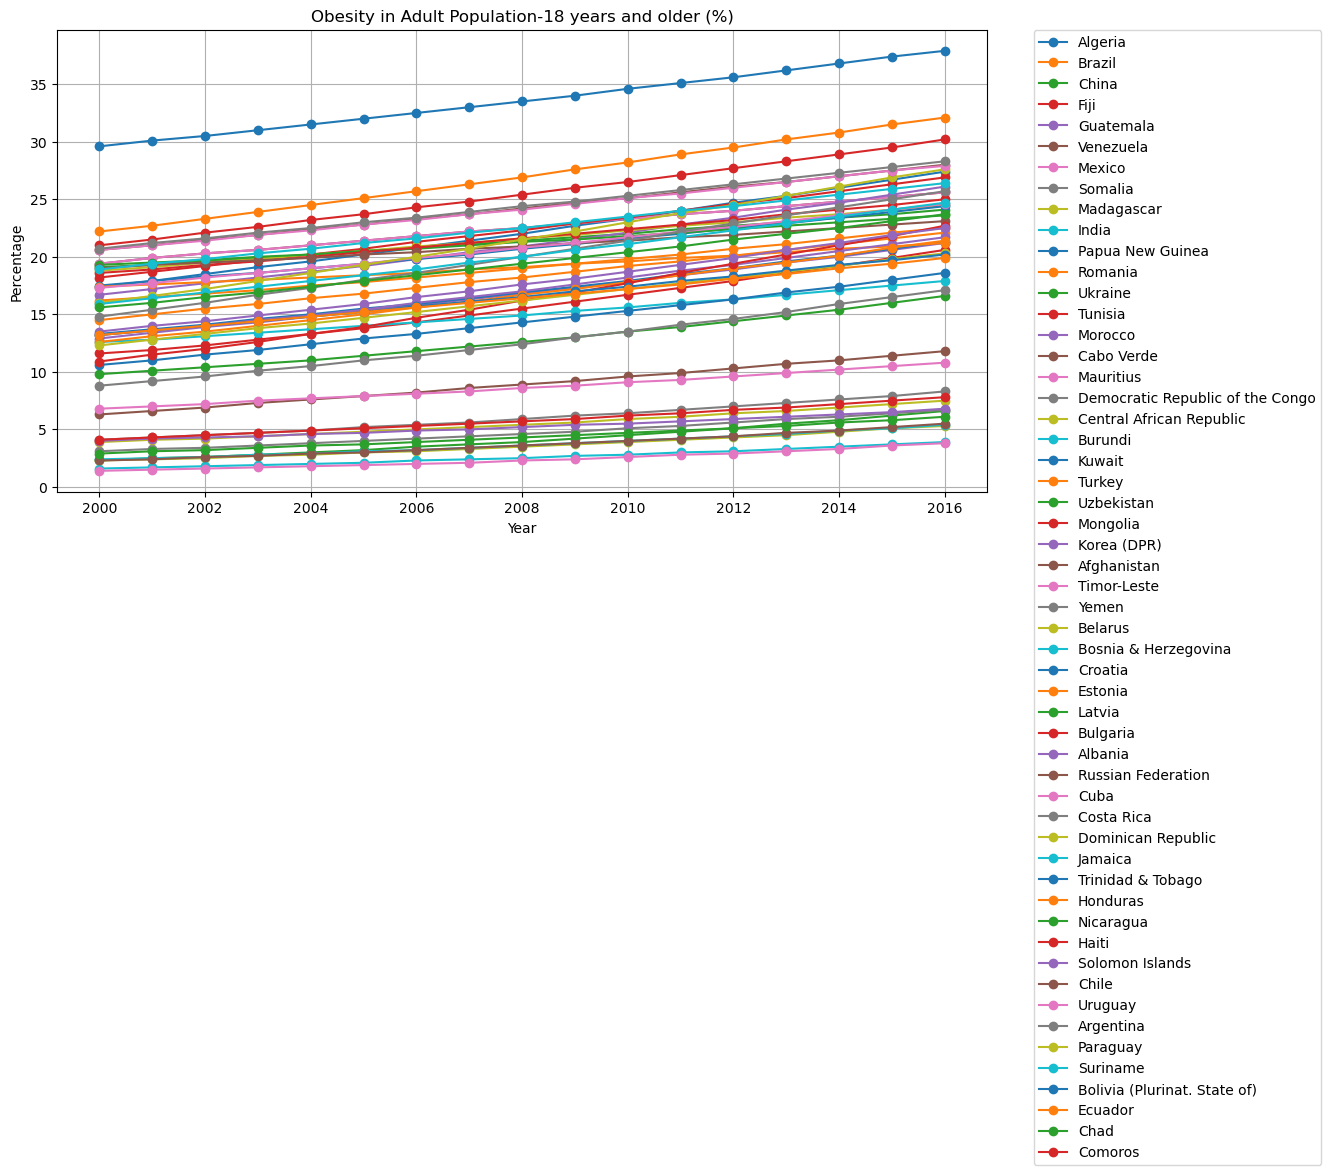

In [259]:
plt.figure(figsize=(12, 6))
for country in df.columns[1:]:
    plt.plot(df['Year'], df[country], marker='o', linestyle='-', label=country)

plt.title('Obesity in Adult Population-18 years and older (%)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

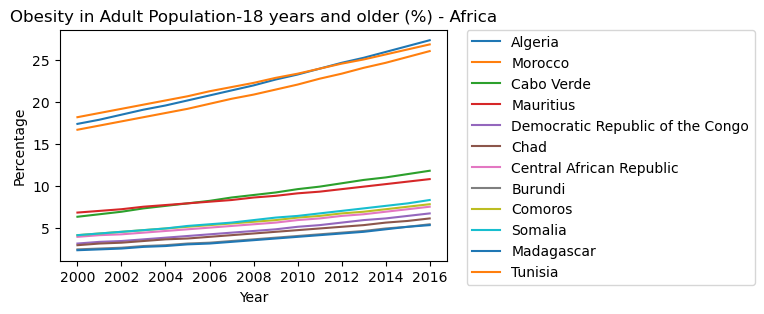

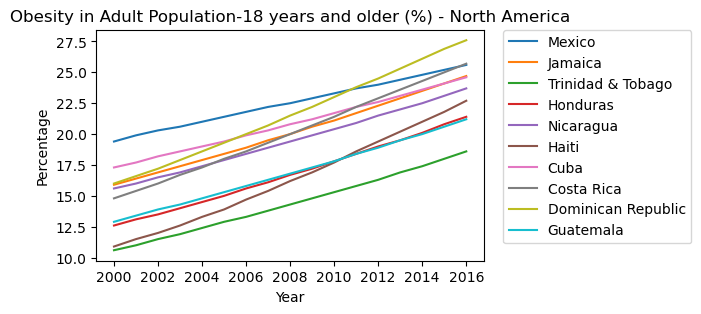

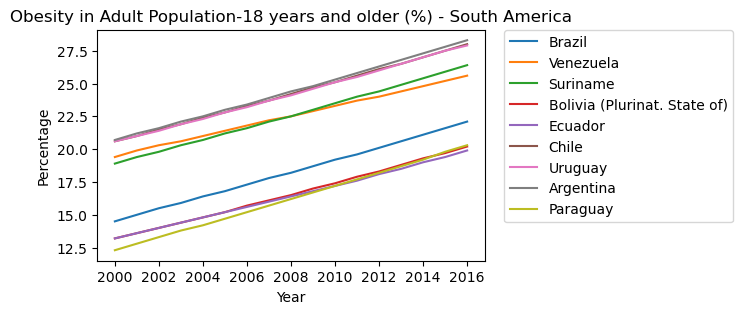

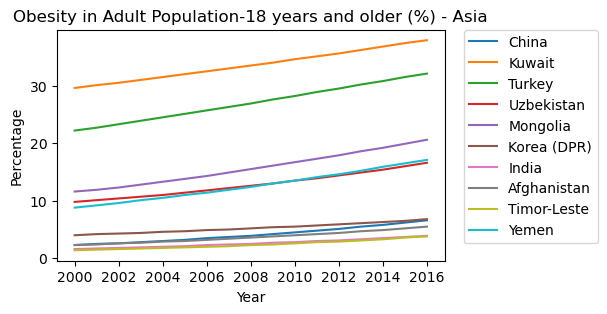

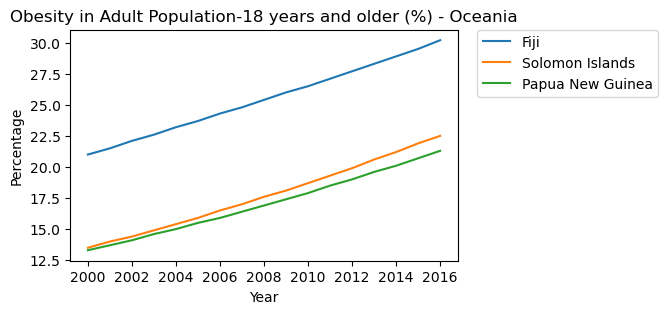

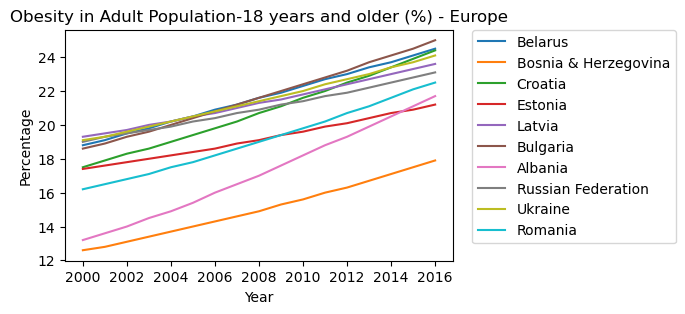

In [260]:

# Continent mapping
continent_mapping = {
    'Africa': ['Algeria', 'Morocco', 'Cabo Verde', 'Mauritius', 'Democratic Republic of the Congo',
               'Chad', 'Central African Republic', 'Burundi', 'Comoros', 'Somalia','Madagascar','Tunisia'],
    'North America': ['Mexico', 'Jamaica', 'Trinidad & Tobago', 'Honduras', 'Nicaragua', 'Haiti',
                      'Cuba', 'Costa Rica', 'Dominican Republic', 'Guatemala'],
    'South America': ['Brazil', 'Venezuela', 'Suriname', 'Bolivia (Plurinat. State of)', 'Ecuador','Chile','Uruguay','Argentina','Paraguay'],
    'Asia': ['China', 'Kuwait', 'Turkey', 'Uzbekistan', 'Mongolia', 'Korea (DPR)', 'India',
             'Afghanistan', 'Timor-Leste', 'Yemen'],
    'Oceania': ['Fiji', 'Solomon Islands', 'Papua New Guinea'],
    'Europe': ['Belarus', 'Bosnia & Herzegovina', 'Croatia', 'Estonia', 'Latvia', 'Bulgaria',
               'Albania', 'Russian Federation', 'Ukraine', 'Romania']
}
# Create separate graphs for each continent
for continent, countries in continent_mapping.items():
    # Filter the countries for the current continent
    continent_df = df[['Year'] + countries]

    # Melt the DataFrame to gather all years into a single column
    ghi_df = continent_df.melt(id_vars='Year', var_name='Country', value_name='GHI Score')

    # Convert 'Year' column to numeric data type
    ghi_df['Year'] = ghi_df['Year'].astype(int)

    # Line plot for GHI Scores over time for each country in the continent
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='Year', y='GHI Score', hue='Country', data=ghi_df, palette='tab10')
    plt.title(f'Obesity in Adult Population-18 years and older (%) - {continent}')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

In [261]:

mean_cont_df = df.copy()
transposed_df = mean_cont_df.transpose()
transposed_df = transposed_df.set_axis(transposed_df.iloc[0], axis=1).drop(transposed_df.index[0])
# Rename a specific column (e.g., '0' is the default column name after transposition)
#transposed_df = transposed_df.rename(columns={0: 'Country'})
#transposed_df = transposed_df.rename(columns={'Year':'Country'})
#transposed_df.columns = transposed_df.columns.astype(int)
transposed_df.index.name = 'Country'

# Change the column names from float to integer (remove the decimal part)
transposed_df.columns = transposed_df.columns.astype(int)
transposed_df.columns
#print(transposed_df)


Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year')

In [262]:
transposed_df['Continent'] = transposed_df.index.map(lambda country: next((continent for continent, countries in continent_mapping.items() if country in countries), 'Unknown'))

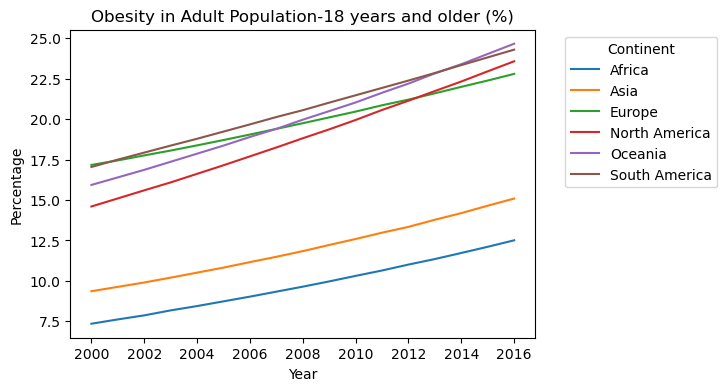

In [263]:
#print(transposed_df)
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016]
ct_mean_df = transposed_df.groupby('Continent')[years].mean()

# Transpose the DataFrame to get years as columns and continents as rows
ct_mean_df = ct_mean_df.T

# Plot the line chart
plt.figure(figsize=(6, 4))
for continent in ct_mean_df.columns:
    plt.plot(years, ct_mean_df[continent], label=continent)
    

plt.title('Obesity in Adult Population-18 years and older (%)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()